##User interaction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\DATA SCIENCE\\Kaholas assignment\\user_interactions.csv",encoding='latin-1')
df.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [3]:
df.shape

(5000, 3)

In [4]:
df.isnull().sum()

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [5]:
df.isnull().any()

User_ID               False
Page_Viewed           False
Time_Spent_Seconds    False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [7]:
df.describe()

,Time_Spent_Seconds
count,5000.000000
mean,304.508800
std,168.978666
min,10.000000
25%,160.000000
50%,301.000000
75%,452.000000
max,599.000000


In [8]:
# Calculate the most visited pages
most_visited_pages = df['Page_Viewed'].value_counts()

In [9]:
most_visited_pages

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

In [10]:
# Calculate the total number of visits for each section
total_visits_per_section = df['Page_Viewed'].value_counts()

In [11]:
total_visits_per_section

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

In [12]:
# Calculate the average time spent on each page
average_time_spent = df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()

In [13]:
average_time_spent

Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64

In [14]:
# Display the results
print("Most Visited Pages:")
print(most_visited_pages)

print("\nAverage Time Spent on Each Page:")
print(average_time_spent)

Most Visited Pages:
Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

Average Time Spent on Each Page:
Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64


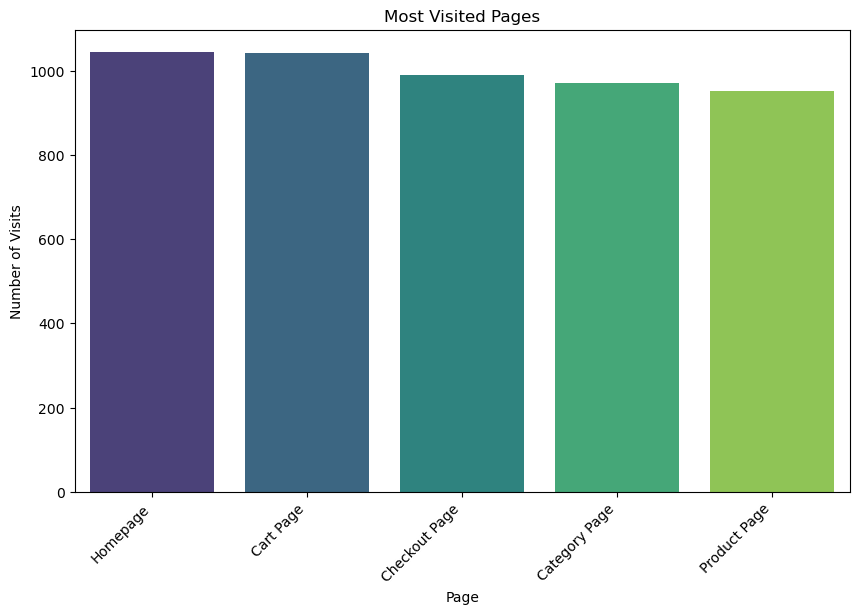

In [15]:
# Create visualizations
# Bar plot for most visited pages
plt.figure(figsize=(10, 6))
sns.barplot(x=most_visited_pages.index, y=most_visited_pages.values, palette='viridis')
plt.title('Most Visited Pages')
plt.xlabel('Page')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.show()

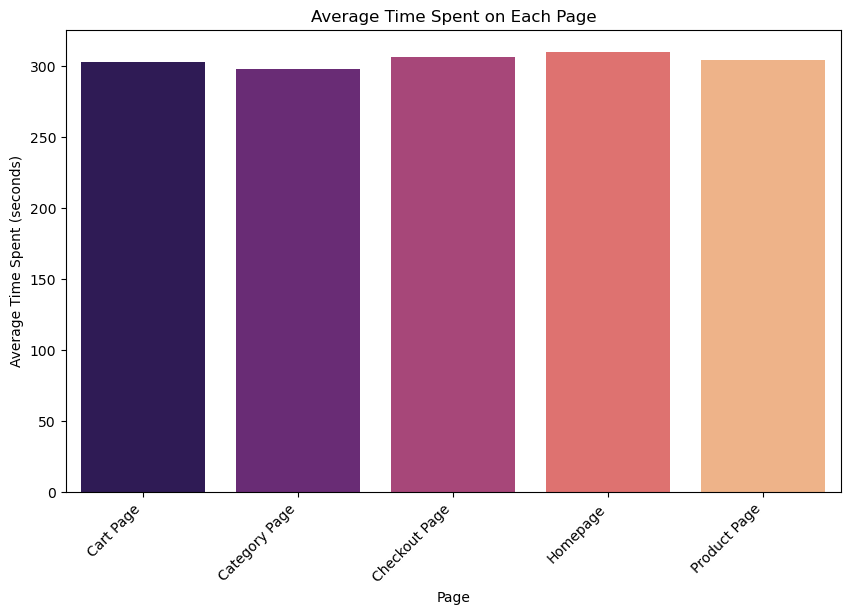

In [16]:
# Bar plot for average time spent on each page
plt.figure(figsize=(10, 6))
sns.barplot(x=average_time_spent.index, y=average_time_spent.values, palette='magma')
plt.title('Average Time Spent on Each Page')
plt.xlabel('Page')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
# Calculate the total number of interactions or visits
total_interactions = df.shape[0]

In [18]:
# Calculate the number of click-through events (user viewed a different page after the current page)
click_through_events = df['Page_Viewed'].ne(df['Page_Viewed'].shift(-1)).sum()


In [19]:
click_through_events

4025

In [20]:
# Calculate the click-through rate
click_through_rate = click_through_events / total_interactions

In [21]:
click_through_rate

0.805

In [22]:
# Display the click-through rate
print("Click-Through Rate for Different Sections: {:.2%}".format(click_through_rate))

Click-Through Rate for Different Sections: 80.50%


In [23]:
df.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [24]:
# Convert the "Time_Spent_Seconds" column to numeric
df['Time_Spent_Seconds'] = pd.to_numeric(df['Time_Spent_Seconds'], errors='coerce')


In [25]:
# Convert the "Page_Viewed" column to lowercase for consistency
df['Page_Viewed'] = df['Page_Viewed'].str.lower()

In [26]:
# Find the first interaction date for each user (signup date)
signup_dates = df.groupby('User_ID')['Time_Spent_Seconds'].idxmin()

In [27]:
df['Signup_Date'] = df.loc[signup_dates, 'Time_Spent_Seconds'].index.to_series().map(df['Time_Spent_Seconds'])


In [28]:
# Convert "Signup_Date" and "Time_Spent_Seconds" columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Time_Spent_Seconds'] = pd.to_datetime(df['Time_Spent_Seconds'])


In [29]:
# Extract the signup month from the "Signup_Date"
df['Signup_Month'] = df['Signup_Date'].dt.to_period('M')


In [30]:
# Calculate the cohort size (number of sign-ups) for each month
cohort_sizes = df.groupby('Signup_Month')['User_ID'].nunique()

In [31]:
# Create a pivot table to track user retention over time
cohorts = df.pivot_table(index='Signup_Month', columns='Time_Spent_Seconds', values='User_ID', aggfunc=pd.Series.nunique)


In [32]:
# Calculate the retention rate for each cohort
retention_rate = cohorts.divide(cohort_sizes, axis=0)

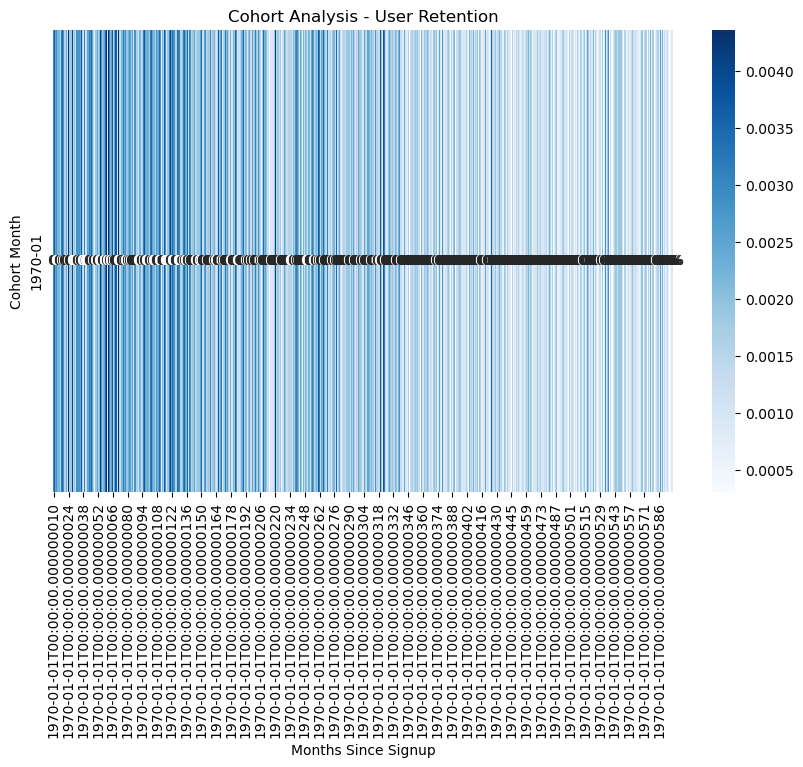

In [33]:
# Plot the cohort analysis heatmap
plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis - User Retention')
sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='Blues')
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort Month')
plt.show()

In [34]:
df.head()

,User_ID,Page_Viewed,Time_Spent_Seconds,Signup_Date,Signup_Month
0,User_3198,homepage,1970-01-01 00:00:00.000000560,NaT,NaT
1,User_126,category page,1970-01-01 00:00:00.000000168,1970-01-01 00:00:00.000000168,1970-01
2,User_1376,category page,1970-01-01 00:00:00.000000122,1970-01-01 00:00:00.000000122,1970-01
3,User_1117,cart page,1970-01-01 00:00:00.000000329,NaT,NaT
4,User_3683,category page,1970-01-01 00:00:00.000000391,NaT,NaT
